In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score

In [ ]:
df= pd.read_csv('breast-cancer-data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df= df.drop(['Unnamed: 32', 'id'],axis=1)

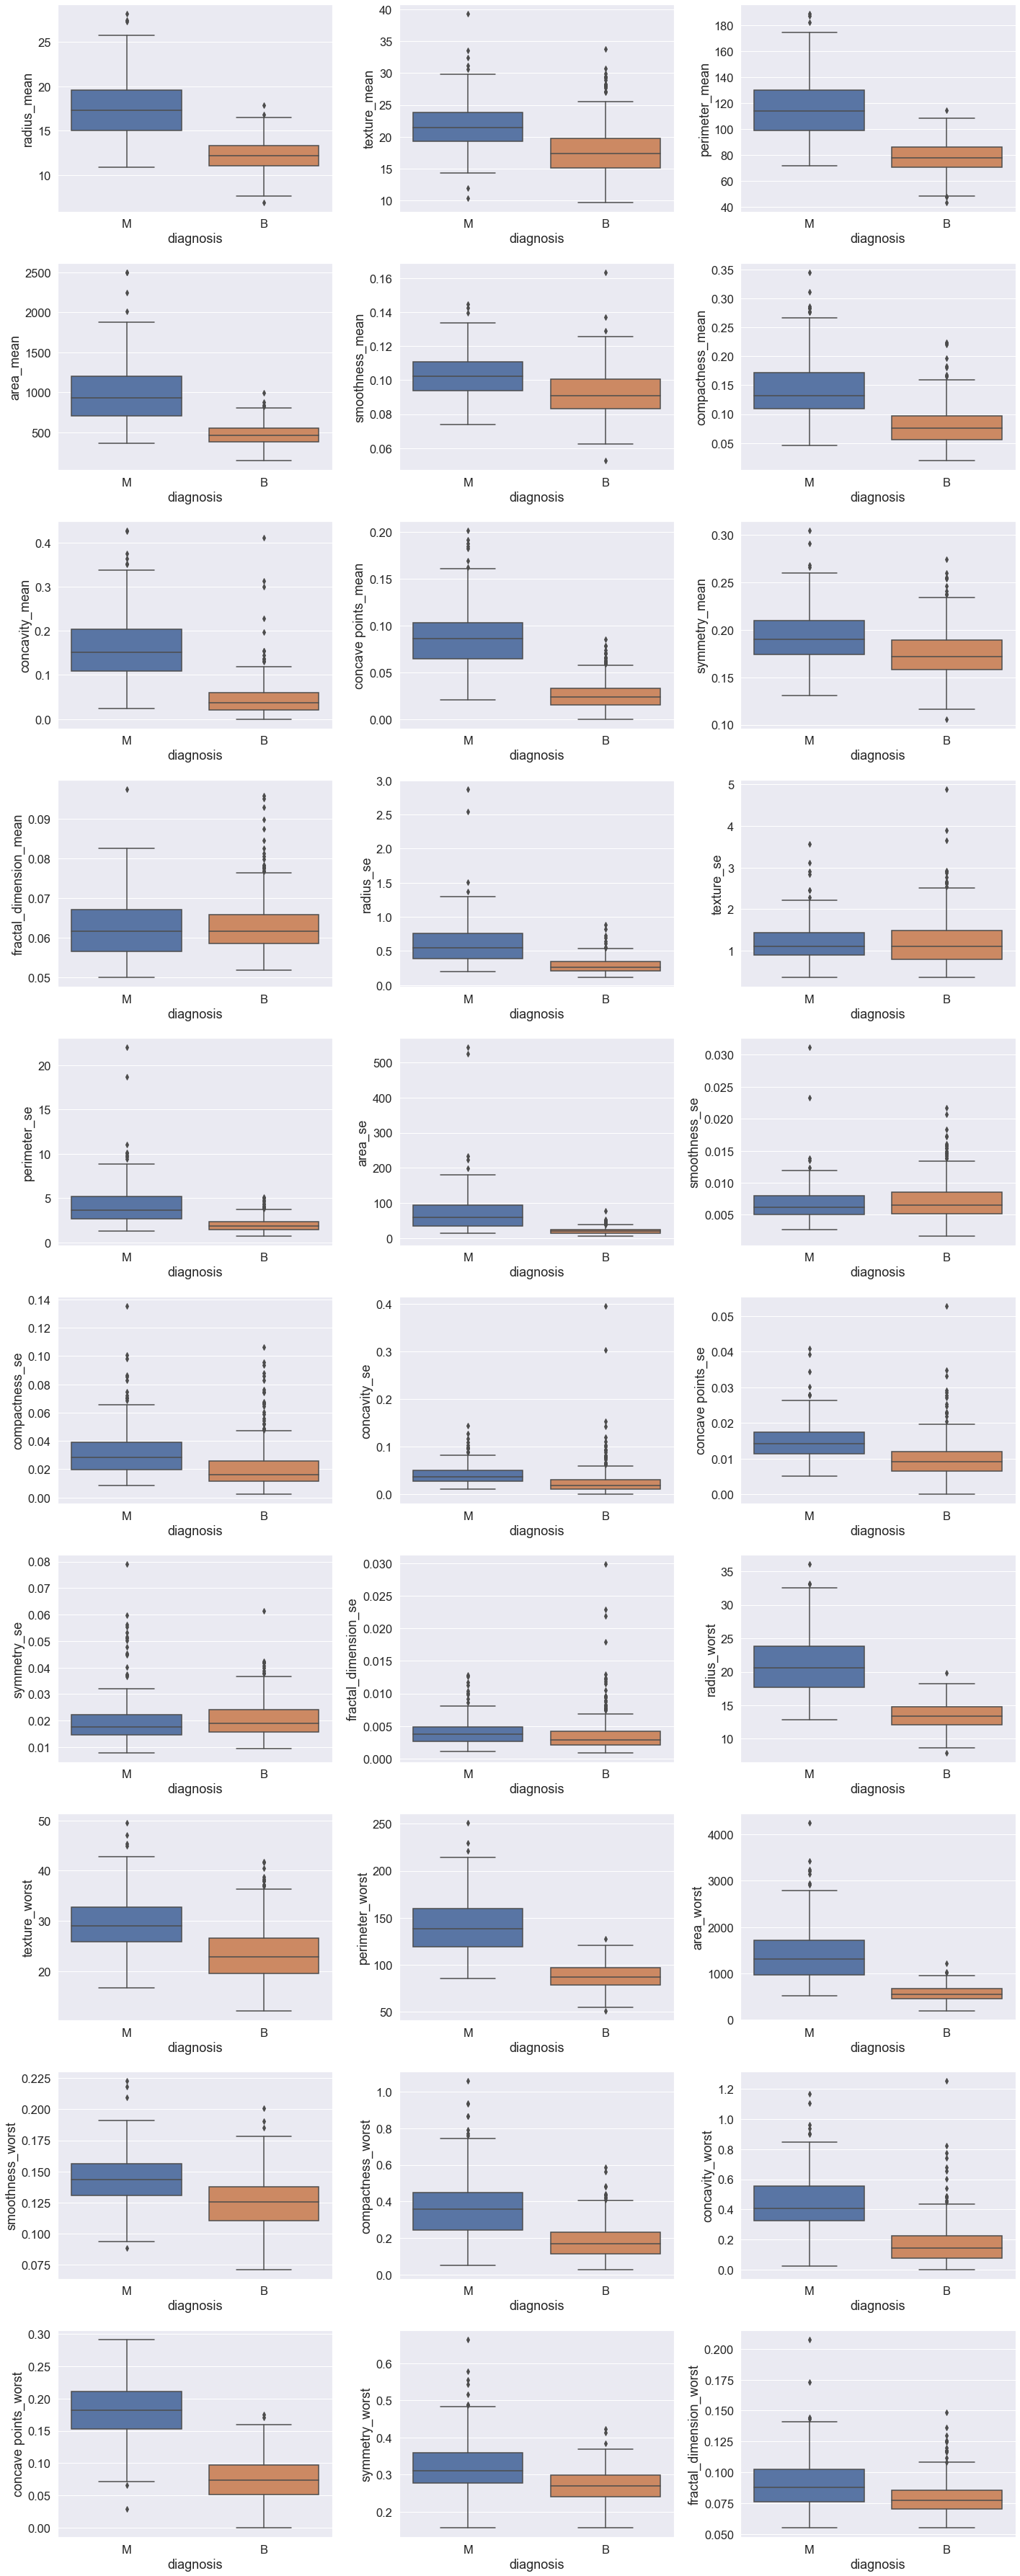

In [ ]:
temp = df.iloc[:, 1:]
sns.set(font_scale=1.5)
fig, ax = plt.subplots(ncols=3, nrows=10, figsize=(20, 50))
index = 0
ax = ax.flatten()
for key, val in temp.items():
    sns.boxplot(x=df["diagnosis"], y=key, data=temp, ax=ax[index])
    index += 1
plt.tight_layout()

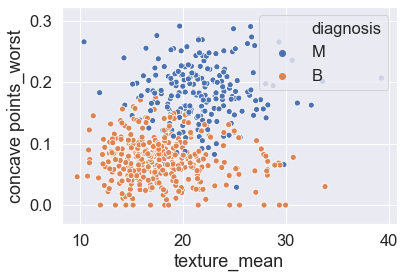

In [ ]:
sns.scatterplot(df['texture_mean'],df['concave points_worst'], hue=df['diagnosis'])

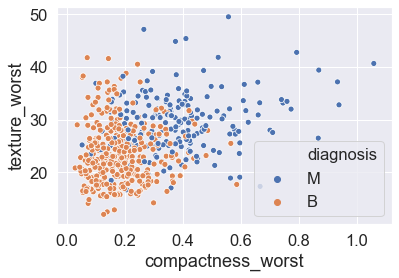

In [ ]:
sns.scatterplot(df['compactness_worst'],df['texture_worst'], hue=df['diagnosis'])

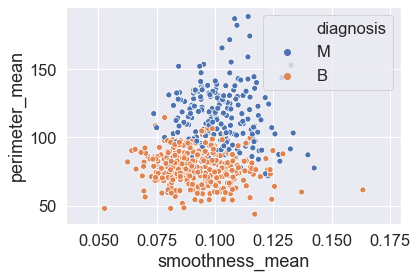

In [ ]:
sns.scatterplot(df['smoothness_mean'],df['perimeter_mean'], hue=df['diagnosis'])

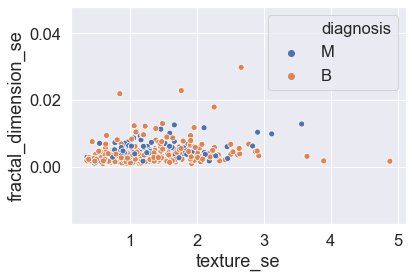

In [ ]:
sns.scatterplot(df['texture_se'],df['fractal_dimension_se'], hue=df['diagnosis'])

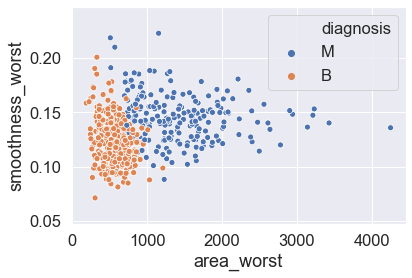

In [ ]:
sns.scatterplot(df['area_worst'],df['smoothness_worst'], hue=df['diagnosis'])

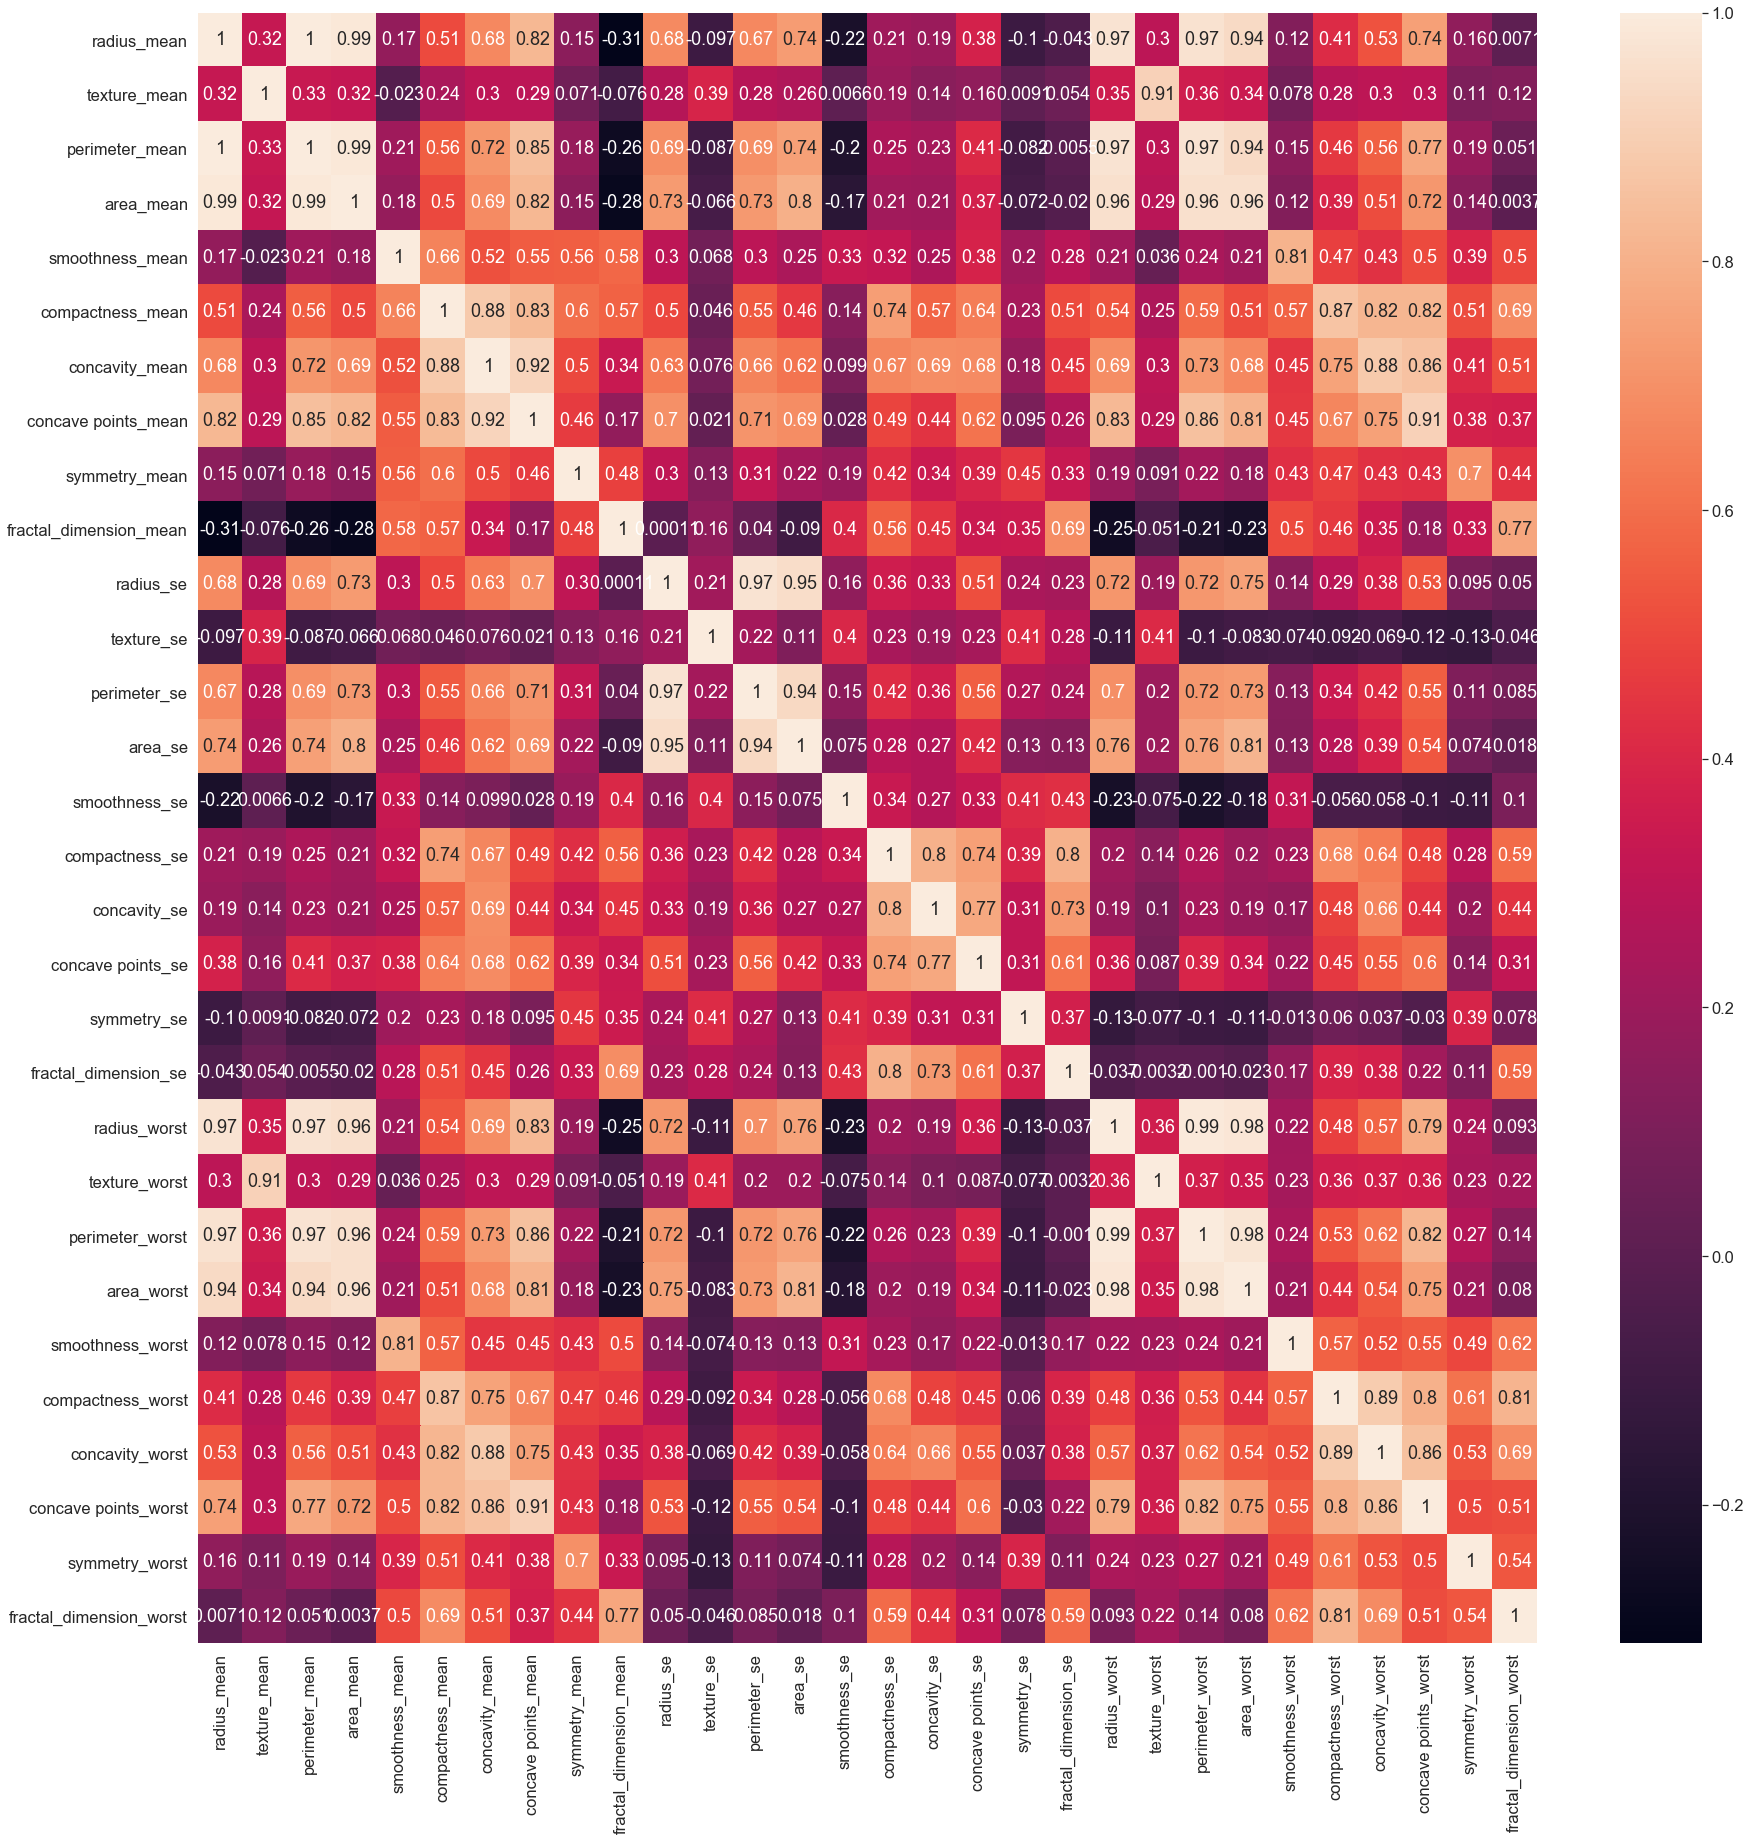

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot= True)

In [ ]:
df1= df.drop([ 'perimeter_mean',
       'area_mean','concavity_mean',
       'concave points_mean',
      'perimeter_se', 'area_se', 
       'concavity_se', 'concave points_se', 
       'fractal_dimension_se', 'texture_worst',
       'perimeter_worst', 'area_worst', 
        'concavity_worst', 'concave points_worst','radius_worst'], axis=1)

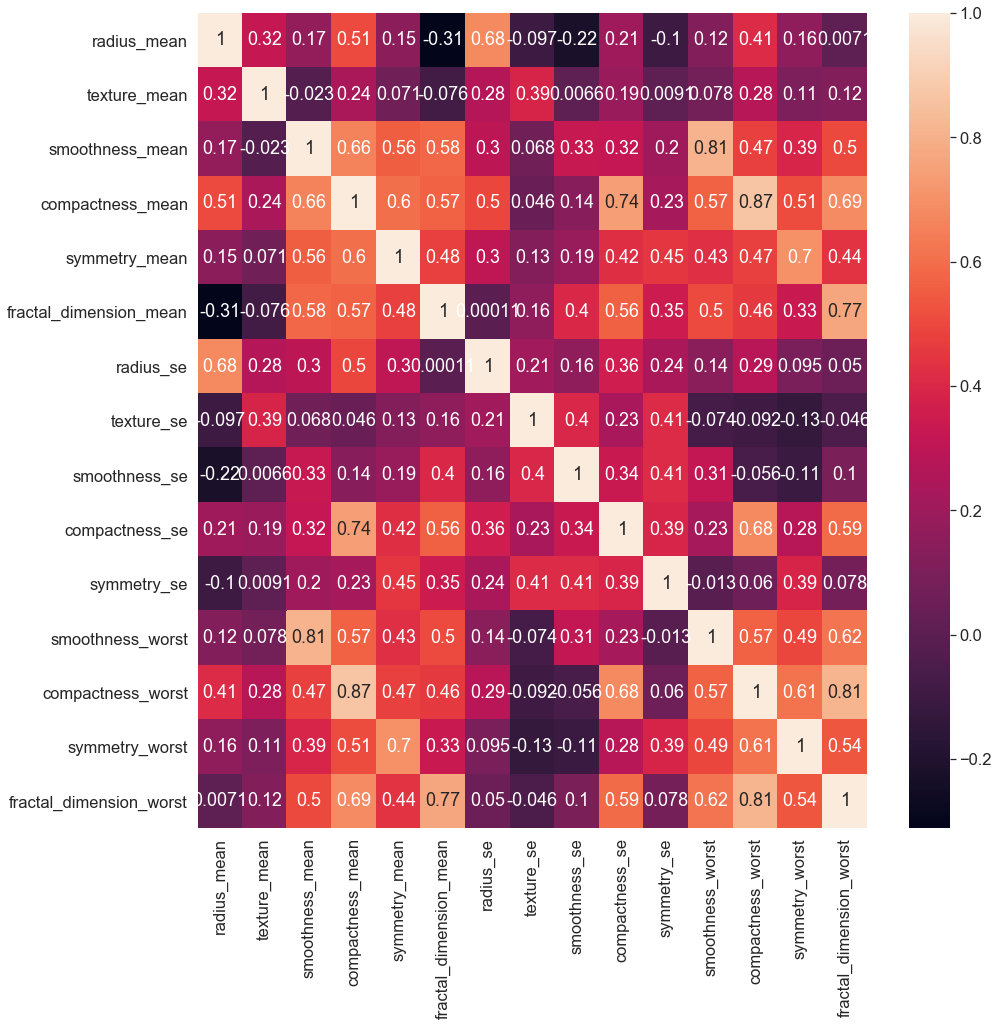

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(), annot= True)

In [ ]:
df1['diagnosis']= df1['diagnosis'].map({'B':0, 'M':1})

In [ ]:
df_train, df_test= train_test_split(df1, train_size=0.7, test_size=0.3, random_state=1)

In [ ]:
y_train= df_train.pop('diagnosis')
X_train= df_train

In [ ]:
scaler= MinMaxScaler()

In [ ]:
cols= X_train.columns

In [ ]:
X_train= scaler.fit_transform(X_train)
X_train= pd.DataFrame(X_train,columns= cols)

In [ ]:
X_train.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,0.214823,0.176530,0.439379,0.219587,0.415657,0.251373,0.051093,0.149797,0.168236,0.075315,0.139269,0.447269,0.143761,0.275050,0.244994
1,0.287236,0.324653,0.252505,0.069243,0.383333,0.104812,0.104689,0.188693,0.196417,0.047624,0.238073,0.204253,0.038018,0.218687,0.082236
2,0.341663,0.365911,0.331137,0.341987,0.225253,0.216436,0.084309,0.145377,0.081382,0.230030,0.126365,0.291422,0.346592,0.242485,0.250241
3,0.240854,0.126141,0.517920,0.264514,0.301515,0.348055,0.049316,0.031780,0.190842,0.069682,0.194160,0.534438,0.149252,0.304359,0.271014
4,0.219083,0.213392,0.507087,0.364432,0.417172,0.284773,0.047250,0.082589,0.141789,0.133671,0.172204,0.464439,0.208333,0.305862,0.204090


In [ ]:
logm1 = sm.GLM(list(y_train),(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\Anushka H\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Anushka H\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:946: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\Anushka H\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
C:\Users\Anushka H\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in add
  n * np.log(1 - mu)) * var_weights


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  398
Model:                            GLM   Df Residuals:                      382
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 28 Jul 2020   Deviance:                          nan
Time:                        22:23:19   Pearson chi2:                     347.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -29.6867      7.246     -4.097      0.000     -43.889     -15.485
radius_mean                34.9746     11.270      3.103      0.002      12.886      57.063
texture_mean               10.5821      4.326      2.446      0.014       2.103      19.061
smoothness_mean            -2.7541      9.856     -0.279      0.780     -22.071      16.563
compactness_mean            7.9105     11.501      0.688      0.492     -14.631      30.453
symmetry_mean               5.5153      6.220      0.887      0.375      -6.675      17.706
fractal_dimension_mean    -14.8173     11.163     -1.327      0.184     -36.696       7.061
radius_se                  54.9509     16.292      3.373      0.001      23.019      86.883
texture_se                  3.0873      4.832      0.639      0.523      -6.383      12.558
smoothness_se               8.4881      6.849      1.239      0.215      -4.935      21.912
compactness_se            -21.7947     10.703     -2.036      0.042     -42.771      -0.818
symmetry_se                -8.1114      6.736     -1.204      0.228     -21.313       5.090
smoothness_worst            7.9607      8.180      0.973      0.330      -8.072      23.994
compactness_worst          19.0506     14.946      1.275      0.202     -10.244      48.345
symmetry_worst              7.1393      7.430      0.961      0.337      -7.423      21.702
fractal_dimension_worst     5.8694      7.203      0.815      0.415      -8.249      19.987
===========================================================================================
"""

In [ ]:
logreg = LogisticRegression()
rfe = RFE(logreg, 5)            
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('radius_mean', True, 1),
 ('texture_mean', True, 1),
 ('smoothness_mean', False, 6),
 ('compactness_mean', False, 2),
 ('symmetry_mean', False, 7),
 ('fractal_dimension_mean', False, 3),
 ('radius_se', True, 1),
 ('texture_se', False, 11),
 ('smoothness_se', False, 9),
 ('compactness_se', False, 10),
 ('symmetry_se', False, 5),
 ('smoothness_worst', True, 1),
 ('compactness_worst', True, 1),
 ('symmetry_worst', False, 4),
 ('fractal_dimension_worst', False, 8)]

In [ ]:
col= X_train.columns[rfe.support_]

In [ ]:
logm2 = sm.GLM(list(y_train),(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm2.fit().summary()

C:\Users\Anushka H\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Anushka H\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:946: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\Anushka H\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
C:\Users\Anushka H\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in add
  n * np.log(1 - mu)) * var_weights


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  398
Model:                            GLM   Df Residuals:                      392
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 28 Jul 2020   Deviance:                          nan
Time:                        22:23:51   Pearson chi2:                     660.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -25.8548      4.164     -6.210      0.000     -34.015     -17.694
radius_mean          36.1628      6.548      5.522      0.000      23.328      48.998
texture_mean          9.7506      2.555      3.817      0.000       4.743      14.758
radius_se            20.8475      7.163      2.910      0.004       6.808      34.887
smoothness_worst     14.5990      3.464      4.214      0.000       7.809      21.389
compactness_worst     6.9080      2.851      2.423      0.015       1.319      12.497
=====================================================================================
"""

In [ ]:
log_reg1= LogisticRegression()

In [ ]:
log_reg1.fit(X_train[col],y_train)
y_train_pred= log_reg1.predict(X_train[col])

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[247,   2],
       [ 23, 126]], dtype=int64)

In [ ]:
y_test= df_test.pop('diagnosis')
X_test= df_test

In [ ]:
cols= X_test.columns

In [ ]:
X_test= scaler.transform(X_test)
X_test= pd.DataFrame(X_test,columns= cols)

In [ ]:
X_test.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,0.364854,0.144403,0.455629,0.614320,0.518182,0.523401,0.156253,0.254332,0.280892,0.376934,0.327247,0.396421,0.369214,0.315882,0.394796
1,0.292915,0.302672,0.570281,0.387999,0.539394,0.385190,0.062298,0.117906,0.163817,0.158530,0.151981,0.709437,0.427527,0.584669,0.671271
2,0.282503,0.213392,0.432157,0.224637,0.338384,0.317732,0.034123,0.089153,0.238366,0.133521,0.321854,0.509344,0.197132,0.454409,0.435057
3,0.536182,0.299966,0.300172,0.244277,0.283333,0.088113,0.051637,0.025526,0.039195,0.052040,0.022168,0.344912,0.238532,0.410822,0.151729
4,0.385678,0.679743,0.275977,0.099768,0.400000,0.059328,0.127933,0.279968,0.173981,0.090260,0.423162,0.288120,0.078376,0.417585,0.068958


In [ ]:
y_test_pred= log_reg1.predict(X_test[col])

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[108,   0],
       [ 13,  50]], dtype=int64)

In [ ]:
y_train_pred1= log_reg1.predict_proba(X_train[col])

In [ ]:
temp_df= pd.DataFrame({'Actual':y_train, 'Probability':y_train_pred1[:,1],'Predicted':y_train_pred})

In [ ]:
temp_df.head()

,Actual,Probability,Predicted
249,0,0.096800,0
58,0,0.093509,0
476,0,0.365859,0
529,0,0.123013,0
422,0,0.136390,0


In [ ]:
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    temp_df[i]= temp_df['Probability'].map(lambda x: 1 if x > i else 0)
temp_df.head()

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


,Actual,Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95
249,0,0.096800,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
58,0,0.093509,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
476,0,0.365859,0,1,1,1,1,0,0,0,...,1,1,1,1,0,0,0,0,0,0
529,0,0.123013,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
422,0,0.136390,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [float(x)/20 for x in range(20)]
for i in num:
    cm1 = confusion_matrix(temp_df['Actual'],temp_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.374372  1.000000  0.000000
0.05  0.05  0.439698  1.000000  0.104418
0.10  0.10  0.610553  0.993289  0.381526
0.15  0.15  0.751256  0.993289  0.606426
0.20  0.20  0.846734  0.993289  0.759036
0.25  0.25  0.902010  0.986577  0.851406
0.30  0.30  0.937186  0.979866  0.911647
0.35  0.35  0.952261  0.959732  0.947791
0.40  0.40  0.959799  0.939597  0.971888
0.45  0.45  0.947236  0.892617  0.979920
0.50  0.50  0.937186  0.845638  0.991968
0.55  0.55  0.927136  0.812081  0.995984
0.60  0.60  0.907035  0.758389  0.995984
0.65  0.65  0.891960  0.711409  1.000000
0.70  0.70  0.866834  0.644295  1.000000
0.75  0.75  0.839196  0.570470  1.000000
0.80  0.80  0.821608  0.523490  1.000000
0.85  0.85  0.781407  0.416107  1.000000
0.90  0.90  0.731156  0.281879  1.000000
0.95  0.95  0.680905  0.147651  1.000000


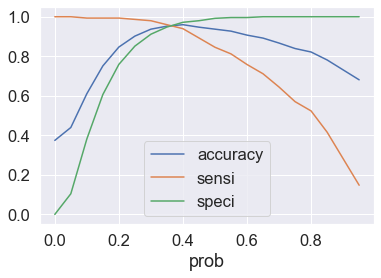

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
temp_df['final_predicted'] =temp_df['Probability'].map( lambda x: 1 if x > 0.4 else 0)

In [ ]:
confusion_matrix(temp_df['Actual'],temp_df['final_predicted'])

array([[242,   7],
       [  9, 140]], dtype=int64)

In [ ]:
y_test_pred1= log_reg1.predict_proba(X_test[col])

In [ ]:
test_temp_df= pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred,'Probability':y_test_pred1[:,1]})

In [ ]:
test_temp_df['final_predicted'] =test_temp_df['Probability'].map( lambda x: 1 if x > 0.4 else 0)

In [ ]:
confusion_matrix(test_temp_df['Actual'],test_temp_df['final_predicted'])

array([[105,   3],
       [  7,  56]], dtype=int64)

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve( temp_df['Actual'], temp_df['final_predicted'], drop_intermediate = False )

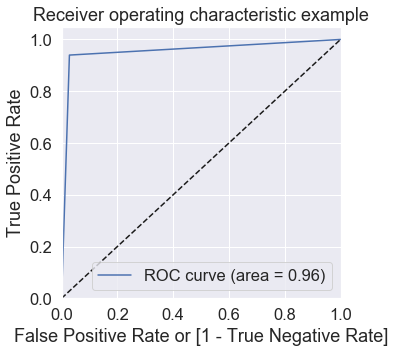

In [ ]:
draw_roc(temp_df['Actual'], temp_df['final_predicted'])

In [ ]:
fpr, tpr, thresholds = roc_curve( test_temp_df['Actual'], test_temp_df['final_predicted'], drop_intermediate = False )

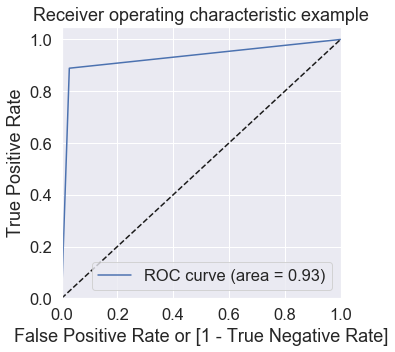

In [ ]:
draw_roc(test_temp_df['Actual'], test_temp_df['final_predicted'])